## Feature encodeing and model training

In [1]:
# Handle missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('clean_data.csv')
dataset
df = dataset.copy()
df.drop("Unnamed: 0" , axis =1,inplace = True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,total_services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,0


In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'total_services'],
      dtype='object')

In [4]:
## seprating the  dataset have numerical colum and have categorical comlumns
categorical_feature  = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_feature  = [feature for feature in df.columns if df[feature].dtype != 'O']

In [5]:
categorical_feature , numeric_feature,len(categorical_feature)

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'total_services'],
 15)

In [6]:
binary_cols = [
   'gender',
  'Partner',
  'Dependents',
  'PhoneService',
    'PaperlessBilling'
]

categorical_cols = [
    'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
    'PaymentMethod'
]

numeric_cols = [
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'total_services'
]
print(len(binary_cols)+len(categorical_cols)+len(numeric_cols))

19


In [7]:
df.shape

(7043, 20)

In [8]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("bin", OneHotEncoder(drop="if_binary"), binary_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [10]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
preprocessor.fit(X_train)


,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [11]:
X_train = preprocessor.fit_transform(X_train)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test=preprocessor.transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train)

In [38]:
y_train

3738    0
3151    0
4860    0
3867    0
3810    0
       ..
6303    0
6227    1
4673    1
2710    0
5639    0
Name: Churn, Length: 5634, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from  xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [15]:
models={
    "LogisticRegression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "GradientBoost":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "Xgboost" : XGBClassifier(),
    "svc" : SVC(),
    "knc" :KNeighborsClassifier()
}


In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(name)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

LogisticRegression trained successfully.
LogisticRegression
Model performance for Training set
- Accuracy: 0.8049
- F1 score: 0.7985
- Precision: 0.6607
- Recall: 0.5445
- Roc Auc Score: 0.7217
----------------------------------
Model performance for Test set
- Accuracy: 0.7977
- F1 score: 0.7925
- Precision: 0.6386
- Recall: 0.5481
- Roc Auc Score: 0.7180


Decision Tree trained successfully.
Decision Tree
Model performance for Training set
- Accuracy: 0.9979
- F1 score: 0.9979
- Precision: 0.9993
- Recall: 0.9926
- Roc Auc Score: 0.9962
----------------------------------
Model performance for Test set
- Accuracy: 0.7374
- F1 score: 0.7413
- Precision: 0.5049
- Recall: 0.5561
- Roc Auc Score: 0.6795


RandomForest trained successfully.
RandomForest
Model performance for Training set
- Accuracy: 0.9979
- F1 score: 0.9979
- Precision: 0.9973
- Recall: 0.9946
- Roc Auc Score: 0.9968
----------------------------------
Model performance for Test set
- Accuracy: 0.7722
- F1 score: 0.7629
- 

In [17]:
## Conclusion alot of the model are overfited so need to do hyperparameter tuneing to avoid it 

## Hyperparameter Training

In [18]:
Logistic_parms = {
    'C': [0.01, 0.1, 1, 10, 50, 100], 
    'solver': ['liblinear', 'lbfgs'], 
    'max_iter': [1000],
    'class_weight': [None, 'balanced']  # 'balanced' helps Recall significantly
}

svc_parms = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced'] # Critical for Recall
}

knc_parms = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'], # 'distance' gives higher weight to closer neighbors
    'p': [1, 2] 
}

decisiontree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    ##'max_features': [None, 'sqrt', 'log2'], # varied features improve AUC stability
    'class_weight': [None, 'balanced']
}

Randomc_parms = {
    'n_estimators': [50, 100, 150, 200], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'], 
    'class_weight': [None, 'balanced', 'balanced_subsample'] # 'balanced_subsample' is very powerful for RF
}


AdaBoost_parms = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
    "estimator__max_depth": [1, 2, 3], # Deeper base trees can sometimes help Recall
    "algorithm": ["SAMME"] # Remember: SAMME.R is deprecated
}

Gradient_parms = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5], 
    'subsample': [0.7, 0.8, 0.9, 1.0], # Lower subsample (<1.0) improves generalization/AUC
    'min_samples_leaf': [1, 2, 4] # Added to prevent overfitting
}


XGBoost_parms = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5], # Controls overfit, helps AUC
    'scale_pos_weight': [1, 5, 10], # High value = Forces model to find "1"s (High Recall)
    'tree_method': ['hist'] 
}

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
random_cv = [
    ("logistic", LogisticRegression(), Logistic_parms),
    ("svc", SVC(probability=True), svc_parms),
    ("knc", KNeighborsClassifier(), knc_parms),
    ("decision tree", DecisionTreeClassifier(), decisiontree_params),
    ("randomforest", RandomForestClassifier(), Randomc_parms),
    ("AdaBoostClassifier", AdaBoostClassifier(estimator=DecisionTreeClassifier(),random_state=42), AdaBoost_parms),
    ("gradiantboost", GradientBoostingClassifier(), Gradient_parms),
    ("xgboost", XGBClassifier(eval_metric="logloss",use_label_encoder=False), XGBoost_parms)
]

In [20]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in random_cv :
    print(f"Checking {name}...", end=" ")
    if model is None:
        print(" BROKEN (This is None)")
    else:
        print(" OK")
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=10,
                                   cv=2,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Checking logistic...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking svc...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking knc...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking decision tree...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking randomforest...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking AdaBoostClassifier...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking gradiantboost...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Checking xgboost...  OK
Fitting 2 folds for each of 10 candidates, totalling 20 fits
---------------- Best Params for logistic -------------------
{'solver': 'liblinear', 'max_iter': 1000, 'class_weight': None, 'C': 100}
---------------- Best Params for svc -------------------
{'kernel': 'linear', 'gamma': 'auto', 'class_weight': None, 'C': 50}
---------------- Best Params for knc 

In [21]:
model_param

{'logistic': {'solver': 'liblinear',
  'max_iter': 1000,
  'class_weight': None,
  'C': 100},
 'svc': {'kernel': 'linear', 'gamma': 'auto', 'class_weight': None, 'C': 50},
 'knc': {'weights': 'uniform', 'p': 2, 'n_neighbors': 11},
 'decision tree': {'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_depth': 30,
  'class_weight': None},
 'randomforest': {'n_estimators': 200,
  'min_samples_split': 10,
  'max_features': 'sqrt',
  'max_depth': 10,
  'class_weight': None},
 'AdaBoostClassifier': {'n_estimators': 200,
  'learning_rate': 0.1,
  'estimator__max_depth': 3,
  'algorithm': 'SAMME'},
 'gradiantboost': {'subsample': 0.9,
  'n_estimators': 50,
  'min_samples_leaf': 2,
  'max_depth': 4,
  'learning_rate': 0.1},
 'xgboost': {'tree_method': 'hist',
  'scale_pos_weight': 1,
  'n_estimators': 100,
  'min_child_weight': 3,
  'max_depth': 3,
  'learning_rate': 0.05}}

In [22]:


tuned_models = {
    "LogisticRegression": LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        class_weight=None,
        C=100
    ),

    "SVC": SVC(
        kernel='linear',
        gamma='auto',
        class_weight=None,
        C=10,
        probability=True  # Required for calculating ROC-AUC score
    ),

    "KNN": KNeighborsClassifier(
        weights='uniform',
        p=2,
        n_neighbors=11
    ),

    "Decision Tree": DecisionTreeClassifier(
        min_samples_split=2,
        min_samples_leaf=4,
        max_depth=10,
        class_weight=None
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        min_samples_split=10,
        max_features='sqrt',
        max_depth=None,
        class_weight=None
    ),

    "AdaBoostClassifier": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3), # Based on estimator__max_depth=3
        n_estimators=150,
        learning_rate=0.1,
        algorithm='SAMME'
    ),

    "GradientBoosting": GradientBoostingClassifier(
        subsample=0.7,
        n_estimators=50,
        min_samples_leaf=2,
        max_depth=4,
        learning_rate=0.05
    ),

    "XGBoost": XGBClassifier(
        tree_method='hist',
        scale_pos_weight=1,
        n_estimators=200,
        min_child_weight=1,
        max_depth=3,
        learning_rate=0.05
    )
}

In [23]:
evaluation_list =[]
for name,model in tuned_models.items():
    print(f"-----executing{name}-----------")
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

     # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    print("----completed-----")
    evaluation_list.append([name , "train" , model_train_accuracy,model_train_f1,model_train_precision ,model_train_recall,model_train_rocauc_score])
    evaluation_list.append([name , "test" , model_test_accuracy, model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score])

-----executingLogisticRegression-----------
----completed-----
-----executingSVC-----------
----completed-----
-----executingKNN-----------
----completed-----
-----executingDecision Tree-----------
----completed-----
-----executingRandomForest-----------
----completed-----
-----executingAdaBoostClassifier-----------
----completed-----
-----executingGradientBoosting-----------
----completed-----
-----executingXGBoost-----------
----completed-----


In [24]:
evaluation_dataframe =  pd.DataFrame(evaluation_list , columns=["Model", "Dataset", 'accuracy_score',  'f1_score',
                            'precision_score', 'recall_score',  'roc_auc_score' ])

In [25]:
evaluation_dataframe

,Model,Dataset,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
0,LogisticRegression,train,0.805822,0.799364,0.663141,0.545151,0.722563
1,LogisticRegression,test,0.794180,0.789013,0.630435,0.542781,0.713902
2,SVC,train,0.803692,0.797669,0.655974,0.547157,0.721754
3,SVC,test,0.793471,0.788620,0.627692,0.545455,0.714273
4,KNN,train,0.818424,0.815678,0.673021,0.614047,0.753146
5,KNN,test,0.772179,0.770458,0.574230,0.548128,0.700634
6,Decision Tree,train,0.858182,0.856660,0.748571,0.701003,0.807979
7,Decision Tree,test,0.762243,0.759322,0.556196,0.516043,0.683625
8,RandomForest,train,0.888711,0.884468,0.862876,0.690301,0.825339
9,RandomForest,test,0.792761,0.783170,0.643357,0.491979,0.696714


0.20352905705234914 this is best threshold for this model LogisticRegression(C=100, max_iter=1000)
0.20166515738501428 this is best threshold for this model SVC(C=10, gamma='auto', kernel='linear', probability=True)
0.2727272727272727 this is best threshold for this model KNeighborsClassifier(n_neighbors=11)
0.2 this is best threshold for this model DecisionTreeClassifier(max_depth=10, min_samples_leaf=4)
0.3071879860335743 this is best threshold for this model RandomForestClassifier(min_samples_split=10)
0.37853860902235853 this is best threshold for this model AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=150)
0.23647419627179478 this is best threshold for this model GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=2,
                           n_estimators=50, subsample=0.7)
0.29469517 this is best threshold for this model XGBClassifier(base_score=

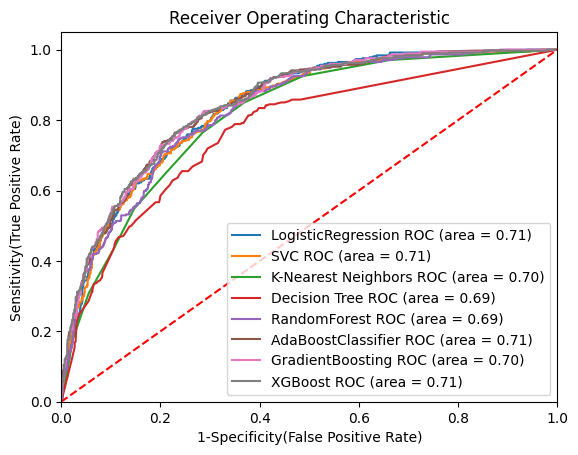

In [26]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'LogisticRegression',
        'model': LogisticRegression(solver='lbfgs', max_iter=1000, class_weight=None, C=100),
        'auc': 0.7139
    },
    {
        'label': 'SVC',
        'model': SVC(kernel='linear', gamma='auto', class_weight=None, C=10, probability=True),
        'auc': 0.7143
    },
    {
        'label': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(weights='uniform', p=2, n_neighbors=11),
        'auc': 0.7006
    },
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=4, max_depth=10, class_weight=None),
        'auc': 0.6863
    },
    {
        'label': 'RandomForest',
        'model': RandomForestClassifier(n_estimators=100, min_samples_split=10, max_features='sqrt', max_depth=None, class_weight=None),
        'auc': 0.6930
    },
    {
        'label': 'AdaBoostClassifier',
        'model': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=150, learning_rate=0.1, algorithm='SAMME'),
        'auc': 0.7074
    },
    {
        'label': 'GradientBoosting',
        'model': GradientBoostingClassifier(subsample=0.7, n_estimators=50, min_samples_leaf=2, max_depth=4, learning_rate=0.05),
        'auc': 0.7001
    },
    {
        'label': 'XGBoost',
        'model': XGBClassifier(tree_method='hist', scale_pos_weight=1, n_estimators=200, min_child_weight=1, max_depth=3, learning_rate=0.05),
        'auc': 0.7085
    }
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print(best_thresh,f"this is best threshold for this model {model}")
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 


In [27]:
best_thresholds = {
    "LogisticRegression": 0.2035,
    "SVC": 0.2025,
    "KNN": 0.2727,
    "Decision Tree": 0.20,
    "RandomForest": 0.2723,
    "AdaBoostClassifier": 0.3785,
    "GradientBoosting": 0.2578,
    "XGBoost": 0.2947
}


In [28]:
# ---------------- Helper function ---------------- #
def apply_threshold(y_prob, threshold):
    return (y_prob >= threshold).astype(int)

# ---------------- Evaluation ---------------- #
evaluation_list = []

for name, model in tuned_models.items():
    print(f"----- Executing {name} -----")

    # Fit model
    model.fit(X_train, y_train)

    # Get best threshold for this model
    threshold = best_thresholds[name]

    # ================= TRAIN ================= #
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_train_pred = apply_threshold(y_train_prob, threshold)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob)

    # ================= TEST ================= #
    y_test_prob = model.predict_proba(X_test)[:, 1]
    y_test_pred = apply_threshold(y_test_prob, threshold)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # evaluation_list.append([
    #     name, "Train", threshold,
    #     train_accuracy, train_precision, train_recall, train_f1, train_roc_auc
    # ])

    evaluation_list.append([
        name, "Test", threshold,
        test_accuracy, test_precision, test_recall, test_f1, test_roc_auc
    ])

    print("----- Completed -----\n")

# ---------------- Results DataFrame ---------------- #
evaluation_df = pd.DataFrame(
    evaluation_list,
    columns=[
        "Model", "Dataset", "Threshold",
        "Accuracy", "Precision", "Recall", "F1", "ROC_AUC"
    ]
)

evaluation_df

----- Executing LogisticRegression -----
----- Completed -----

----- Executing SVC -----
----- Completed -----

----- Executing KNN -----
----- Completed -----

----- Executing Decision Tree -----
----- Completed -----

----- Executing RandomForest -----
----- Completed -----

----- Executing AdaBoostClassifier -----
----- Completed -----

----- Executing GradientBoosting -----
----- Completed -----

----- Executing XGBoost -----
----- Completed -----



,Model,Dataset,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC
0,LogisticRegression,Test,0.2035,0.711143,0.475483,0.855615,0.611270,0.837601
1,SVC,Test,0.2025,0.709723,0.473842,0.847594,0.607862,0.832605
2,KNN,Test,0.2727,0.689141,0.454286,0.850267,0.592179,0.811025
3,Decision Tree,Test,0.2000,0.703336,0.464968,0.780749,0.582834,0.773954
4,RandomForest,Test,0.2723,0.732434,0.497409,0.770053,0.604407,0.832503
5,AdaBoostClassifier,Test,0.3785,0.769340,0.546845,0.764706,0.637681,0.844274
6,GradientBoosting,Test,0.2578,0.745209,0.512821,0.802139,0.625652,0.844072
7,XGBoost,Test,0.2947,0.760114,0.532967,0.778075,0.632609,0.844450


In [29]:
# Auto-select best model
best_model_name = (
    evaluation_df.sort_values(by=["Recall"], ascending=False).iloc[0]["Model"]
)

print("Best model from evaluation:", best_model_name)
print("Available model keys:", list(models.keys()))

# Safe fetch
best_model = models[best_model_name]
best_threshold = best_thresholds[best_model_name]


Best model from evaluation: LogisticRegression
Available model keys: ['LogisticRegression', 'Decision Tree', 'RandomForest', 'GradientBoost', 'AdaBoostClassifier', 'Xgboost', 'svc', 'knc']


In [30]:
best_model #'model': LogisticRegression(solver='lbfgs', max_iter=1000, class_weight=None, C=100),

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
# Select top 3 models based on TEST Recall
top_3_models = (
    evaluation_df[evaluation_df["Dataset"] == "Test"]
    .sort_values(by="Recall", ascending=False)
    .head(3)["Model"]
    .tolist()
)

print("🏆 Top 3 Models:", top_3_models)


🏆 Top 3 Models: ['LogisticRegression', 'KNN', 'SVC']


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X_train.select_dtypes(include="number").columns
categorical_features = X_train.select_dtypes(exclude="number").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

final_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", best_model)
])

final_pipeline.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
final_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", best_model)
])

final_pipeline.fit(X_train, y_train)
